In [145]:
import numpy as np 
import pandas as pd 
import os
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from keras.utils import to_categorical
import pywt
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [146]:
penghuni = os.listdir("C:\\Users\\muham\\OneDrive\\Documents\\TA\\images\\train\\Penghuni")
temen1 = os.listdir("C:\\Users\\muham\\OneDrive\\Documents\\TA\\images\\train\\Temen1")
bkn_penghuni = os.listdir("C:\\Users\\muham\\OneDrive\\Documents\\TA\\images\\train\\BukanPenghuni")

In [147]:
totalaccuracy = []
totalprecision = []
totalrecall = []
totalf1 = []

In [148]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels,)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

In [149]:
def CalcFeatures(img, th):
    sift = cv2.xfeatures2d.SIFT_create(th)
    kp, des = sift.detectAndCompute(img, None)
    return des

In [150]:
def bag_of_features(features, centres, k = 500):
    vec = np.zeros((1, k))
    for i in range(features.shape[0]):
        feat = features[i]
        diff = np.tile(feat, (k, 1)) - centres
        dist = pow(((pow(diff, 2)).sum(axis = 1)), 0.5)
        idx_dist = dist.argsort()
        idx = idx_dist[0]
        vec[0][idx] += 1
    return vec

In [151]:
data = []
labels = []
features = []
matrix_zero = np.zeros((81,23))
print(matrix_zero.shape)

(81, 23)


In [152]:
for i in penghuni:

    image = cv2.imread("C:\\Users\\muham\\OneDrive\\Documents\\TA\\images\\train\\penghuni\\"+i, 0)
    
    dim = (50, 50)
    # image_array = Image.fromarray(image , 'RGB')
    resize_img = cv2.resize(image, dim)
    # resize_img = image_array.resize((50 , 50))

    # Canny Edge Detection
    edges = cv2.Canny(image=resize_img, threshold1=100, threshold2=200) # Canny Edge Detection
    # resize_img = image_array.resize((50 , 50))
    
    resize_img = np.float32(resize_img) / 255.0
    
    # Calculate gradient 
    gx = cv2.Sobel(resize_img, cv2.CV_32F, 1, 0, ksize=1)
    gy = cv2.Sobel(resize_img, cv2.CV_32F, 0, 1, ksize=1)
    mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

    coeffs2 = pywt.dwt2(resize_img, 'bior1.3')
    LL, (LH, HL, HH) = coeffs2
    
    # print(len(edges))

    a = np.array(edges)
    b = np.array(mag)
    ab = np.concatenate((a, b), axis=0)
    c = np.array(angle)
    abc = np.concatenate((ab, c), axis=0)
    d = np.array(gx)
    abcd = np.concatenate((abc, d), axis=0)
    e = np.array(gy)
    abcde = np.concatenate((abcd, e), axis=0)
    v = np.array(LL)
    w = np.array(LH)
    vw = np.concatenate((v, w), axis=0)
    x = np.array(HL)
    vwx = np.concatenate((vw, x), axis=0)
    z = np.array(HH)
    vwxz = np.concatenate((vwx, z), axis=0)
    vwxz_zero = np.concatenate((vwx, matrix_zero), axis=1)
    # print(vwxz_zero.shape)
    # print(len(abcde))
    # data.append(np.array(edges))
    all_feature = np.concatenate((abcde, vwxz_zero), axis=0)
    # print(all_feature.shape)
    data.append(np.array(all_feature))
    labels.append(0)
    # labels.append(0)

#     print(len(descriptors))

for u in bkn_penghuni:
    
    image = cv2.imread("C:\\Users\\muham\\OneDrive\\Documents\\TA\\images\\train\\BukanPenghuni\\"+u, 0)
    

    dim = (50, 50)
    # image_array = Image.fromarray(image , 'RGB')
    resize_img = cv2.resize(image, dim)
    # resize_img = image_array.resize((50 , 50))

    # Canny Edge Detection
    edges = cv2.Canny(image=resize_img, threshold1=100, threshold2=200) # Canny Edge Detection
    # resize_img = image_array.resize((50 , 50))
    
    resize_img = np.float32(resize_img) / 255.0
    
    # Calculate gradient 
    gx = cv2.Sobel(resize_img, cv2.CV_32F, 1, 0, ksize=1)
    gy = cv2.Sobel(resize_img, cv2.CV_32F, 0, 1, ksize=1)
    mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

    coeffs2 = pywt.dwt2(resize_img, 'bior1.3')
    LL, (LH, HL, HH) = coeffs2
    # print(len(edges))
    

    a = np.array(edges)
    b = np.array(mag)
    ab = np.concatenate((a, b), axis=0)
    c = np.array(angle)
    abc = np.concatenate((ab, c), axis=0)
    d = np.array(gx)
    abcd = np.concatenate((abc, d), axis=0)
    e = np.array(gy)
    abcde = np.concatenate((abcd, e), axis=0)
    v = np.array(LL)
    w = np.array(LH)
    vw = np.concatenate((v, w), axis=0)
    x = np.array(HL)
    vwx = np.concatenate((vw, x), axis=0)
    z = np.array(HH)
    vwxz = np.concatenate((vwx, z), axis=0)
    vwxz_zero = np.concatenate((vwx, matrix_zero), axis=1)
    # print(vwxz_zero.shape)
    # print(len(abcde))
    # data.append(np.array(edges))
    all_feature = np.concatenate((abcde, vwxz_zero), axis=0)
    data.append(np.array(all_feature))
    # data.append(np.array(vwxz))
    labels.append(1)
    # labels.append(1)

for j in temen1:
    
    image = cv2.imread("C:\\Users\\muham\\OneDrive\\Documents\\TA\\images\\train\\Temen1\\"+j, 0)
    

    dim = (50, 50)
    # image_array = Image.fromarray(image , 'RGB')
    resize_img = cv2.resize(image, dim)
    # resize_img = image_array.resize((50 , 50))

    # Canny Edge Detection
    edges = cv2.Canny(image=resize_img, threshold1=100, threshold2=200) # Canny Edge Detection
    # resize_img = image_array.resize((50 , 50))
    
    resize_img = np.float32(resize_img) / 255.0
    
    # Calculate gradient 
    gx = cv2.Sobel(resize_img, cv2.CV_32F, 1, 0, ksize=1)
    gy = cv2.Sobel(resize_img, cv2.CV_32F, 0, 1, ksize=1)
    mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

    coeffs2 = pywt.dwt2(resize_img, 'bior1.3')
    LL, (LH, HL, HH) = coeffs2
    # print(len(edges))

    a = np.array(edges)
    b = np.array(mag)
    ab = np.concatenate((a, b), axis=0)
    c = np.array(angle)
    abc = np.concatenate((ab, c), axis=0)
    d = np.array(gx)
    abcd = np.concatenate((abc, d), axis=0)
    e = np.array(gy)
    abcde = np.concatenate((abcd, e), axis=0)
    v = np.array(LL)
    w = np.array(LH)
    vw = np.concatenate((v, w), axis=0)
    x = np.array(HL)
    vwx = np.concatenate((vw, x), axis=0)
    z = np.array(HH)
    vwxz = np.concatenate((vwx, z), axis=0)
    vwxz_zero = np.concatenate((vwx, matrix_zero), axis=1)
    # print(vwxz_zero.shape)
    # print(len(abcde))
    # data.append(np.array(edges))
    all_feature = np.concatenate((abcde, vwxz_zero), axis=0)
    # abcde = abcde[:,27]
    
    # data.append(np.array(edges))
    # all_feature = np.concatenate((abcde, vwxz), axis=0)
    data.append(np.array(all_feature))
    labels.append(2)
    # labels.append(2)

In [153]:
cells = np.array(data, dtype=object)
labels = np.array(labels)

np.save('Cells' , cells)
np.save('Labels' , labels)

n = np.arange(cells.shape[0])
np.random.shuffle(n)
cells = cells[n]
labels = labels[n]

cells = cells.astype(np.float32)
# cells = np.reshape(cells, (461,15416,1,1))
labels = labels.astype(np.int32)
cells = cells/255
print(cells.shape)
# cells = np.reshape(cells, (250, 50, 50, 1))

(461, 331, 50)


In [154]:
kf =KFold(n_splits=5, shuffle=True, random_state=42)
cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(cells, labels):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    print("="*20)
    print("Fold: ", cnt)
    print("="*20)
    cnt +=1

    x_train , x , y_train , y = train_test_split(cells[train_index] , labels[train_index] , 
                                                test_size = 0.2 ,
                                                random_state = 11)

    x_eval ,x_test ,y_eval , y_test = train_test_split(x , y , 
                                                        test_size = 0.5 , 
                                                        random_state = 11)

    y_train = to_categorical(y_train, num_classes = 3)
    y_eval = to_categorical(y_eval, num_classes = 3)
    y_test = to_categorical(y_test, num_classes = 3)

    #instantiate the model
    height = 331
    width = 50
    classes = 3
    channels = 1
    epoch = 75
    model = CNNbuild(height = height, width = width, classes = classes, channels = channels)
    model.summary()

    #compile the model
    model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

    #fit the model onto the dataset
    # x_train = np.array (x_train)

    h = model.fit(x_train, y_train, epochs = epoch, batch_size = 32,validation_data=(x_eval,y_eval),shuffle=True)

    #evaluate the model on test data
    predictions = model.evaluate(x_test, y_test)
    evaluation = model.evaluate(x_eval, y_eval)

    print(f'LOSS : {evaluation[0]}')
    print(f'ACCURACY : {evaluation[1]}')
    print(f'LOSS : {predictions[0]}')
    print(f'ACCURACY : {predictions[1]}')

    predict_x=model.predict(x_test) 
    yhat_classes=np.argmax(predict_x,axis=1)
    yhat_classes = to_categorical(yhat_classes, num_classes = 3)

    # print("Precision Score : ",precision_score(y_test, y_pred, 
    #                                            pos_label='positive'
    #                                            average='micro'))
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, yhat_classes)
    print('Accuracy: %f' % accuracy)
    totalaccuracy.append(accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(y_test, yhat_classes, average='macro')
    print('Precision: %f' % precision)
    totalprecision.append(precision)
    # recall: tp / (tp + fn)
    recall = recall_score(y_test, yhat_classes, average='macro')
    print('Recall: %f' % recall)
    totalrecall.append(recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test, yhat_classes, average='macro')
    print('F1 score: %f' % f1)
    totalf1.append(f1)

Fold:1, Train set: 368, Test set:93
Fold:  1
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 329, 48, 32)       320       
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 164, 24, 32)       0         
 ng2D)                                                           
                                                                 
 batch_normalization_40 (Ba  (None, 164, 24, 32)       128       
 tchNormalization)                                               
                                                                 
 dropout_40 (Dropout)        (None, 164, 24, 32)       0         
                                                                 
 conv2d_34 (Conv2D)          (None, 162, 22, 32)       9248      
                                                                 
 max_poo

In [155]:
print("=" * 20)
print("rata-rata Akurasi: ",sum(totalaccuracy)/len(totalaccuracy))
print("rata-rata Presisi: ",sum(totalprecision)/len(totalprecision))
print("rata-rata Recall: ",sum(totalrecall)/len(totalrecall))
print("rata-rata F1: ",sum(totalf1)/len(totalf1))

rata-rata Akurasi:  0.7081081081081081
rata-rata Presisi:  0.714549184905222
rata-rata Recall:  0.6823036240218904
rata-rata F1:  0.6773495468216687


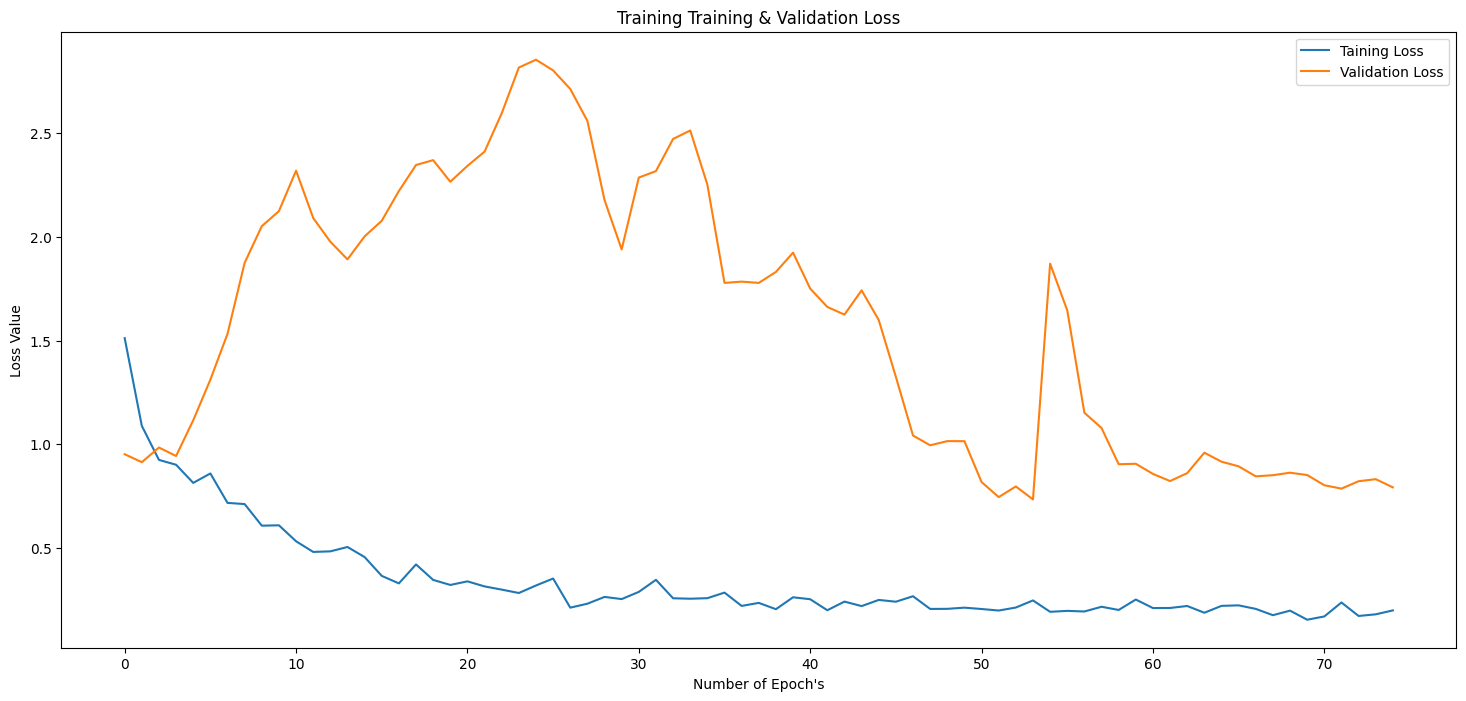

In [156]:
plt.figure(figsize = (18,8))
plt.plot(range(epoch), h.history['loss'], label = 'Taining Loss')
plt.plot(range(epoch), h.history['val_loss'], label = 'Validation Loss')
plt.xlabel("Number of Epoch's")
plt.ylabel('Loss Value')
plt.title('Training Training & Validation Loss')
plt.legend(loc = "best")

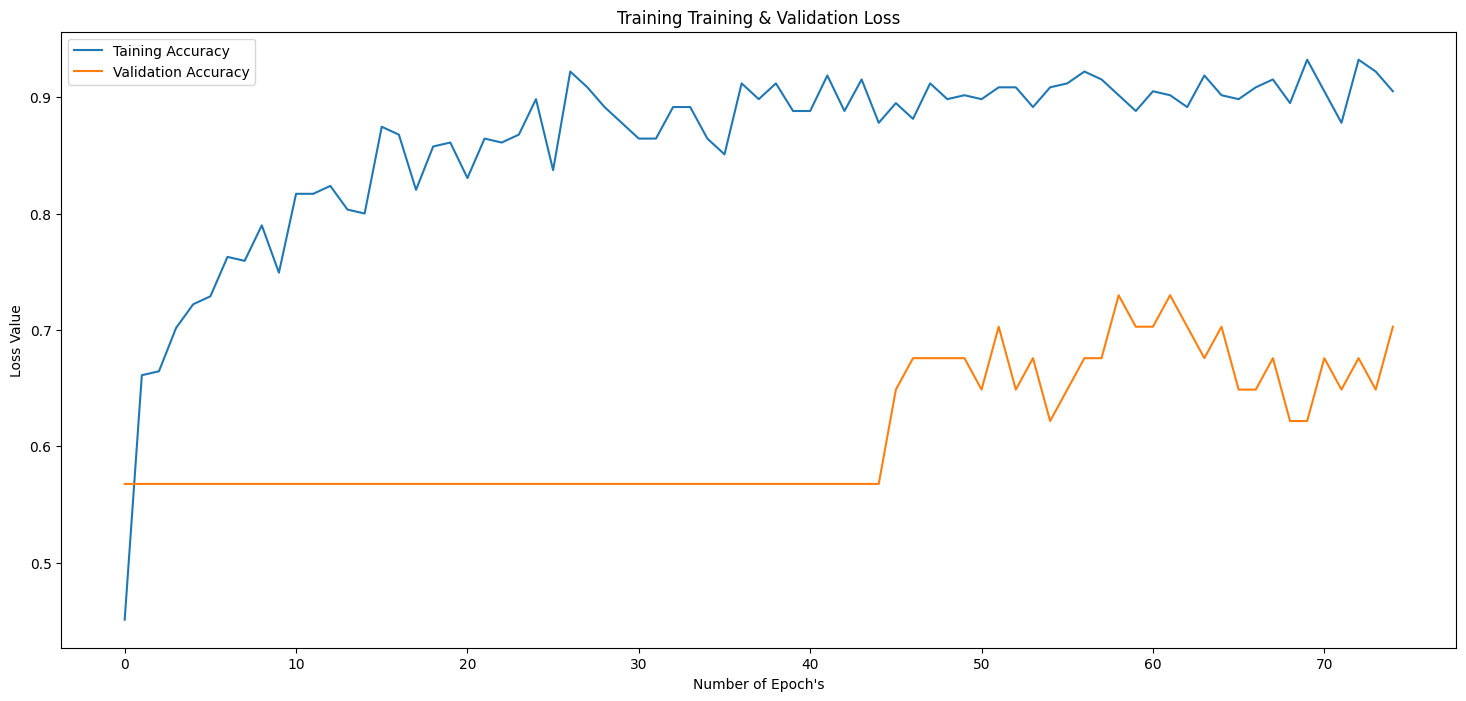

In [157]:
plt.figure(figsize = (18,8))
plt.plot(range(epoch), h.history['accuracy'], label = 'Taining Accuracy')
plt.plot(range(epoch), h.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel("Number of Epoch's")
plt.ylabel('Loss Value')
plt.title('Training Training & Validation Loss')
plt.legend(loc = "best")